In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from nuflux.detgeo import SimulateDetector#, che, plot_sim
from nuflux import detgeo as dg
from nuflux import data
import pickle

In [61]:
NEVENTS = 1e6

sim_mustristan = dg.SimulateDetector(param = 'mutristan s', N_evals = NEVENTS)
sd_mustristan = sim_mustristan.run(collision = 'mu+mu+', Lss = 75)

sim_mokhov = dg.SimulateDetector(param = 'mokhov', N_evals = NEVENTS)
sd_mokhov = sim_mokhov.run(collision = 'mu+mu-', Lss = 50)

sim_mucols2 = dg.SimulateDetector(param = 'mucol s2', N_evals = NEVENTS)
sd_mucols2 = sim_mucols2.run(collision = 'mu+mu-', Lss = 100)

Succesfully simulated decays:
μTRISTAN (s) parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 16.3 s.
Successfully simulated neutrino event rates within Det v2:
μTRISTAN (s) (μ+μ+) at L = 75.00 m.
Total count: 1.14e+11 events; took 11.3 s.

Succesfully simulated decays:
Mohkov et al. (Fermilab) parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 16.6 s.
Successfully simulated neutrino event rates within Det v2:
Mohkov et al. (Fermilab) (μ+μ-) at L = 50.00 m.
Total count: 7.39e+10 events; took 11.8 s.

Succesfully simulated decays:
IMCC-II parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 16.6 s.
Successfully simulated neutrino event rates within Det v2:
IMCC-II (μ+μ-) at L = 100.00 m.
Total count: 1.66e+11 events; took 10.7 s.



In [62]:
version = 'test_MH'
with open(f'gen_data/muTs_{version}.pkl', 'wb') as f:
    pickle.dump(sd_mustristan, f)
with open(f'gen_data/muTs_sim_{version}.pkl', 'wb') as f:
    pickle.dump(sim_mustristan, f)
with open(f'gen_data/mokhov_{version}.pkl', 'wb') as f:
    pickle.dump(sd_mokhov, f)
with open(f'gen_data/mokhov_sim_{version}.pkl', 'wb') as f:
    pickle.dump(sim_mokhov, f)
with open(f'gen_data/mucols2_{version}.pkl', 'wb') as f:
    pickle.dump(sd_mucols2, f)
with open(f'gen_data/mucols2_sim_{version}.pkl', 'wb') as f:
    pickle.dump(sim_mucols2, f)

In [63]:
from nuflux import plot_tools as pt

Text(0.5, 1.0, 'Neutrino fractional energy')

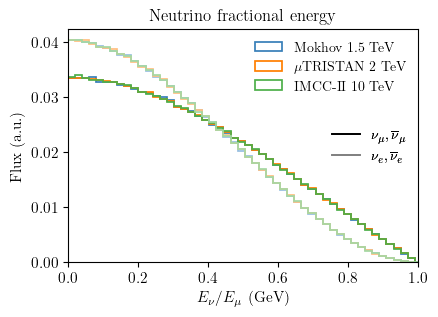

In [64]:
bins = np.linspace(0,2, 100)
Emu_mutristan = 2e3/2
Emu_mokhov = 1.5e3/2
Emu_mucols2 = 10e3/2

light_factor = 0.5
LW=1.25

fig, ax = pt.std_fig()

ax.hist(sim_mokhov.cco.pnumu[:,0]/Emu_mokhov, weights = sim_mokhov.cco.weights, bins = bins, histtype = 'step', label = 'Mokhov 1.5 TeV', color = pt.cblind_safe_wheel[0], zorder = 2, lw=LW)
ax.hist(sim_mokhov.cco.pnue[:,0]/Emu_mokhov, weights = sim_mokhov.cco.weights, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[0],light_factor), zorder = 2, lw=LW)

ax.hist(sim_mustristan.cco.pnumu[:,0]/Emu_mutristan, weights = sim_mustristan.cco.weights, bins = bins, histtype = 'step', label = '$\mu$TRISTAN 2 TeV', color = pt.cblind_safe_wheel[1], zorder = 2, lw=LW)
ax.hist(sim_mustristan.cco.pnue[:,0]/Emu_mutristan, weights = sim_mustristan.cco.weights, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[1],light_factor), zorder = 2, lw=LW)

ax.hist(sim_mucols2.cco.pnumu[:,0]/Emu_mucols2, weights = sim_mucols2.cco.weights, bins = bins, histtype = 'step', label = 'IMCC-II 10 TeV', color = pt.cblind_safe_wheel[2], zorder = 2, lw=LW)
ax.hist(sim_mucols2.cco.pnue[:,0]/Emu_mucols2, weights = sim_mucols2.cco.weights, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[2],light_factor), zorder = 2, lw=LW)

# standard legend
leg1 = ax.legend(loc = 'upper right')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\nu_\mu,\overline\nu_\mu$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$\nu_e,\overline\nu_e$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='center right')

plt.gca().add_artist(leg1)
plt.gca().add_artist(leg2)

ax.set_xlabel(r'$E_{\nu}/E_\mu$ (GeV)')
ax.set_ylabel(r'Flux (a.u.)')
# plt.xscale('log')
# ax.set_xlim(10,0.6*10**4)
ax.set_xlim(0,1)
ax.set_title(r'Neutrino fractional energy', fontsize = 12)
# plt.savefig('plots_Luc/posterplots/pl_e.jpg', bbox_inches = 'tight', dpi = 500)



In [65]:
def get_angle(p):
    # return np.arccos(p[:,-1]/np.linalg.norm(p[:,1:], axis = 1))
    return np.arccos(p[:,-1]/p[:,0])


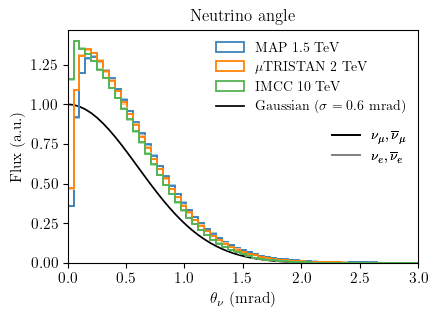

In [67]:
# bins = np.geomspace(1e-2,3, 100)
bins = np.linspace(0,3, 60)
light_factor = 0.5
LW=1.25
units = 1e3#180/np.pi
fig, ax = pt.std_fig()

kwargs = {'zorder': 2, 'lw': LW, 'histtype': 'step', 'bins': bins, 'cumulative': False, 'density': True}
ax.hist(units*get_angle(sim_mokhov.cco.pnue), weights = sim_mokhov.cco.weights, color = pt.lighten_color(pt.cblind_safe_wheel[0],light_factor), **kwargs)
ax.hist(units*get_angle(sim_mokhov.cco.pnumu), weights = sim_mokhov.cco.weights, label = 'MAP 1.5 TeV', color = pt.cblind_safe_wheel[0], **kwargs)

ax.hist(units*get_angle(sim_mustristan.cco.pnue), weights = sim_mustristan.cco.weights, color = pt.lighten_color(pt.cblind_safe_wheel[1],light_factor), **kwargs)
ax.hist(units*get_angle(sim_mustristan.cco.pnumu), weights = sim_mustristan.cco.weights, label = '$\mu$TRISTAN 2 TeV', color = pt.cblind_safe_wheel[1], **kwargs)

ax.hist(units*get_angle(sim_mucols2.cco.pnue), weights = sim_mucols2.cco.weights, color = pt.lighten_color(pt.cblind_safe_wheel[2],light_factor), **kwargs)
ax.hist(units*get_angle(sim_mucols2.cco.pnumu), weights = sim_mucols2.cco.weights, label = 'IMCC 10 TeV', color = pt.cblind_safe_wheel[2], **kwargs)

ax.plot(bins, np.exp(-bins**2/(2*(6e-4*units)**2)), label = 'Gaussian ($\sigma = 0.6$~mrad)', color = 'black', lw = LW, zorder = 1)
# standard legend
leg1 = ax.legend(loc = 'upper right')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\nu_\mu,\overline\nu_\mu$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$\nu_e,\overline\nu_e$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='center right')

plt.gca().add_artist(leg1)
plt.gca().add_artist(leg2)

ax.set_xlabel(r'$\theta_\nu$ (mrad)')
ax.set_ylabel(r'Flux (a.u.)')
# ax.set_xscale('log')
ax.set_xlim(bins.min(), bins.max())
ax.set_title(r'Neutrino angle', fontsize = 12)
plt.savefig('plots/paper_plots/neutrino_angle.jpg', bbox_inches = 'tight', dpi = 500)

In [62]:
N_evals = 1e6
params = ['mutristan s', 'mutristan l', 'mucol s1', 'mucol s2']
param = params[1]
for j in range(0, 10):
    filename = 'gen_data/'+param+'_'+str(j+1)+'.pkl'
    dt = data.get_particles(param, N_evals)
    with open(filename, 'wb') as f:
        pickle.dump(dt, f)


KeyboardInterrupt: 

In [23]:
N_evals = 1e6
params = ['mutristan s', 'mutristan l', 'mucol s1', 'mucol s2']
param = params[3]
for j in range(0, 5):
    filename = 'gen_data/'+param+'_'+str(j+1)+'.pkl'
    dt = data.get_particles(param, N_evals)
    with open(filename, 'wb') as f:
        pickle.dump(dt, f)

In [27]:
with open('gen_data/mucol s2_1.pkl', 'rb') as f:
    data = pickle.load(f)

In [26]:
cc = get_quantities(alr_loaded = True, dt = data)
del data

NameError: name 'get_quantities' is not defined

In [ ]:
cc = get_quantities('mutristan_small', N_evals = 1e5)

In [ ]:
Lc_factor = 0
geom = "approximate_muon_detector_2"
particle = 'both'
sim,sim2 = SimulateDetector(cc, Lc_factor, geom, particle).run()
del cc